In [1]:
# import the libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split 
from sklearn.metrics import root_mean_squared_error,r2_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load the data 
data = pd.read_csv(r"C:\Users\Administrator\Downloads\StudentsPerformance.csv")
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
565,male,group B,associate's degree,standard,none,48,43,45
110,female,group D,associate's degree,free/reduced,completed,77,89,98
358,male,group D,some college,free/reduced,none,59,62,61
140,female,group D,some high school,standard,none,76,72,71
833,female,group B,high school,standard,completed,77,82,89


In [3]:
# check the datatypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


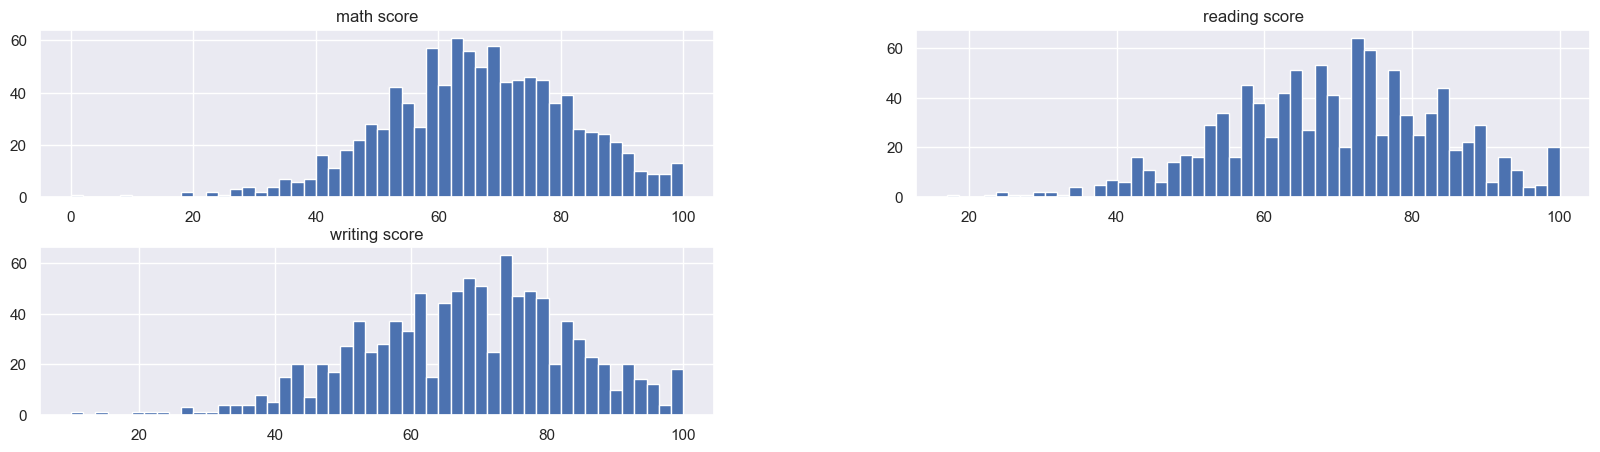

In [4]:
# show the distribution of the numeric values 
%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20, 5))
plt.show()


In [5]:
# Define your custom labels
ethnicity_map = {
    'group A': 'Hispanic',
    'group B': 'Black',
    'group C': 'White',
    'group D': 'Asian',
    'group E': 'Other'
}

data['race/ethnicity'] = data['race/ethnicity'].map(ethnicity_map)


In [6]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
# clean the data 
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# encode the categorical variables 
data = pd.get_dummies(data ,drop_first=True)
data.head(5)

,math score,reading score,writing score,gender_male,race/ethnicity_Black,race/ethnicity_Hispanic,race/ethnicity_Other,race/ethnicity_White,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,False,False,True,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,True,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,False,False,True,False,False,False,True,False,True,True


In [9]:
# convert the encoded values to numerical
data = data.astype({col: 'int' for col in data.select_dtypes('bool').columns})
data.head(5)

,math score,reading score,writing score,gender_male,race/ethnicity_Black,race/ethnicity_Hispanic,race/ethnicity_Other,race/ethnicity_White,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,0,0,1,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,1,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,0,0,1,0,0,0,1,0,1,1


In [10]:
# check for correlations 
cor_matrix = data.corr()
cor_matrix

,math score,reading score,writing score,gender_male,race/ethnicity_Black,race/ethnicity_Hispanic,race/ethnicity_Other,race/ethnicity_White,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
math score,1.000000,0.817580,0.802642,0.167982,-0.084250,-0.091977,0.205855,-0.073387,0.079664,-0.128725,0.060417,0.037056,-0.079852,0.350877,-0.177702
reading score,0.817580,1.000000,0.954598,-0.244313,-0.060283,-0.096274,0.106712,-0.003074,0.096024,-0.151068,0.106452,0.010782,-0.071369,0.229560,-0.241780
writing score,0.802642,0.954598,1.000000,-0.301225,-0.078254,-0.110714,0.089077,-0.010203,0.128297,-0.182211,0.125693,0.027989,-0.097326,0.245769,-0.312946
gender_male,0.167982,-0.244313,-0.301225,1.000000,-0.028466,0.071001,0.020302,-0.063368,-0.011638,0.037952,-0.046188,-0.004460,0.008990,0.021372,-0.006028
race/ethnicity_Black,-0.084250,-0.060283,-0.078254,-0.028466,1.000000,-0.151381,-0.195411,-0.331479,-0.019121,0.069093,-0.056363,-0.036203,0.026531,-0.008257,0.000106
race/ethnicity_Hispanic,-0.091977,-0.096274,-0.110714,0.071001,-0.151381,1.000000,-0.126110,-0.213923,0.016307,0.004919,-0.033551,-0.017751,0.073921,-0.032329,0.006315
race/ethnicity_Other,0.205855,0.106712,0.089077,0.020302,-0.195411,-0.126110,1.000000,-0.276145,0.013221,-0.039494,-0.003180,0.023153,-0.053075,0.052398,-0.059393
race/ethnicity_White,-0.073387,-0.003074,-0.010203,-0.063368,-0.331479,-0.213923,-0.276145,1.000000,0.015682,0.007977,0.001630,-0.015872,-0.045339,-0.003385,-0.012522
parental level of education_bachelor's degree,0.079664,0.096024,0.128297,-0.011638,-0.019121,0.016307,0.013221,0.015682,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,-0.013668,-0.024285
parental level of education_high school,-0.128725,-0.151068,-0.182211,0.037952,0.069093,0.004919,-0.039494,0.007977,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,-0.002211,0.074446


In [11]:
# define the features 
X = data.drop(['math score', 'reading score','writing score'], axis=1)
y =data[['math score', 'reading score','writing score']]

In [12]:
# split the data into train and test 
X_test , X_train ,y_test , y_train = train_test_split(X,y, test_size = 0.2, random_state=42)

In [29]:
# fit the model 
from sklearn.linear_model import LinearRegression 
from sklearn.multioutput import MultiOutputRegressor
linear_model = MultiOutputRegressor(LinearRegression())
linear_model.fit(X_train,y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [30]:
y_pred = model.predict(X_test)

In [31]:
# checking the perfomance of the model 
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 15.877763170082723


In [32]:
# checking out using Randomforestregressor 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [33]:
y_pred = model.predict(X_test)

In [34]:
# checking the perfomance of the model 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 16.008730792285018


In [35]:
import xgboost as xgb
model = MultiOutputRegressor(
    xgb.XGBRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
)
model.fit(X_train, y_train)


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))

In [36]:
# Predict
y_pred = model.predict(X_test)

In [37]:
# checking the perfomance of the model 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 14.440234939983592


In [38]:
# fit gradient boost regressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=42))

In [39]:
y_pred = model.predict(X_test)

In [40]:
# checking the perfomance of the model 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 15.877763170082723


In [50]:
# save the model 
import joblib

# this was my best perfoming model 
joblib.dump(linear_model, 'C:/Users/Administrator/students perfomance/linear_model.pkl')

['C:/Users/Administrator/students perfomance/linear_model.pkl']

In [47]:
print(data.columns.tolist())

['math score', 'reading score', 'writing score', 'gender_male', 'race/ethnicity_Black', 'race/ethnicity_Hispanic', 'race/ethnicity_Other', 'race/ethnicity_White', "parental level of education_bachelor's degree", 'parental level of education_high school', "parental level of education_master's degree", 'parental level of education_some college', 'parental level of education_some high school', 'lunch_standard', 'test preparation course_none']


In [52]:
import os
os.getcwd()

'C:\\Users\\Administrator'